In [ ]:
import os
import yaml
from glob import glob

import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from astropy.io import fits


# read configuration file
with open('config.yml', 'r') as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

In [ ]:
data_dir = config['data_dir']
hsc_lens_dir = os.path.join(data_dir, 'hsc_lenses')

In [21]:
sample_idx = 0

hsc_lens_fits_files = sorted(glob(os.path.join(hsc_lens_dir, f'D2_L_{str(sample_idx).zfill(8)}_*.fits')))
pprint(hsc_lens_fits_files)

['/nfsdata1/bwedig/lsst-strong-lens-data-challenge/hsc_lenses/D2_L_00000000_g.fits',
 '/nfsdata1/bwedig/lsst-strong-lens-data-challenge/hsc_lenses/D2_L_00000000_i.fits',
 '/nfsdata1/bwedig/lsst-strong-lens-data-challenge/hsc_lenses/D2_L_00000000_r.fits',
 '/nfsdata1/bwedig/lsst-strong-lens-data-challenge/hsc_lenses/D2_L_00000000_y.fits',
 '/nfsdata1/bwedig/lsst-strong-lens-data-challenge/hsc_lenses/D2_L_00000000_z.fits']


In [ ]:
sample_fits_file = hsc_lens_fits_files[0]
with fits.open(sample_fits_file) as hdul:
    hdul.info()

    header = hdul[1].header
    data = hdul[1].data

In [7]:
pprint(header)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                13470 / length of dimension 1                          
NAXIS2  =                    1 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    2 / number of table fields                         
TTYPE1  = 'Lens ID '                                                            
TFORM1  = '22A     '                                                            
TTYPE2  = 'band_g  '                                                            
TFORM2  = '1681D   '                                                            
TDIM2   = '(41,41) '        

In [ ]:
for name in data.dtype.names:
    print(f"{name}:")
    pprint(data[0][name])
    print()

Lens ID:
'75339120850791805'

band_g:
array([[ 0.0444136 ,  0.05041009, -0.0279015 , ...,  0.00757697,
         0.02444078, -0.04877532],
       [-0.06894473, -0.02383687, -0.03232392, ...,  0.09592521,
        -0.06673587,  0.05249909],
       [ 0.0757364 , -0.11069233,  0.04072341, ..., -0.01206321,
        -0.03637155,  0.01207908],
       ...,
       [-0.05959735,  0.07000405,  0.00811825, ..., -0.10831009,
        -0.01710687, -0.03151277],
       [ 0.0446799 ,  0.1196659 ,  0.00836481, ..., -0.03302865,
         0.03730235,  0.04041075],
       [ 0.10222739, -0.00695203,  0.02364206, ..., -0.04952586,
        -0.06910938, -0.08513469]], dtype='>f8')



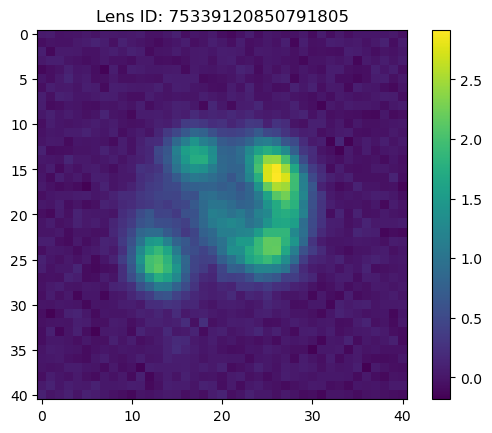

In [23]:
plt.imshow(data[0][1])
plt.title(f'Lens ID: {data[0][0]}')
plt.colorbar()
plt.show()

In [25]:
def get_image(fits_file):
    return fits.getdata(fits_file, ext=1)[0][1]

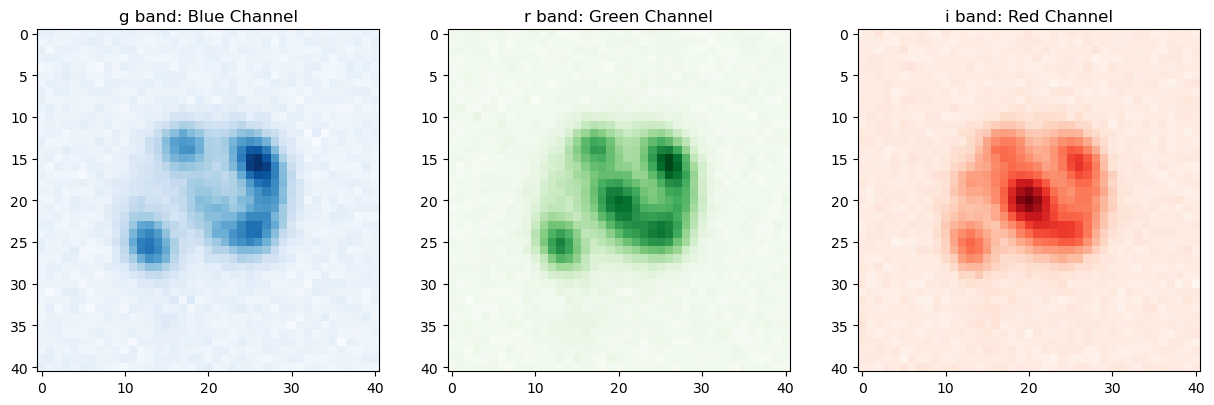

In [31]:
image_blue = get_image(hsc_lens_fits_files[0])
image_green = get_image(hsc_lens_fits_files[2])
image_red = get_image(hsc_lens_fits_files[1])

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(image_blue, cmap='Blues')
ax[0].set_title('g band: Blue Channel')
ax[1].imshow(image_green, cmap='Greens')
ax[1].set_title('r band: Green Channel')
ax[2].imshow(image_red, cmap='Reds')
ax[2].set_title('i band: Red Channel')

plt.show()

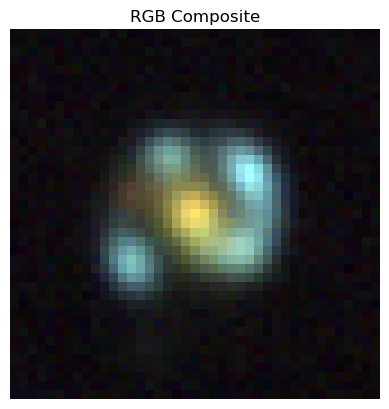

In [ ]:
rgb_image = np.stack([
    (image_red - np.min(image_red)) / (np.max(image_red) - np.min(image_red)),
    (image_green - np.min(image_green)) / (np.max(image_green) - np.min(image_green)),
    (image_blue - np.min(image_blue)) / (np.max(image_blue) - np.min(image_blue))
], axis=-1)

plt.imshow(rgb_image)
plt.title('RGB Composite')
plt.axis('off')
plt.show()